# Basic Modeling Benchmarks
In this notebook I will benchmark various learning models using the same data without preprocessing, feature selection, and hyperparameter tuning to get a general idea for which models are performant on the multiclass classifier problem. Resampling will be used in both training and validation to ensure that minority classes get appropriate representation.

8 models that we'll consider:
* Logistic Regression
* SVC with Linear Kernel
* SVC with RBF Kernel
* k-Nearest Neighbors
* Decision Trees
* Artificial Neural Networks
* Naive Bayes
* AdaBoost


In [3]:
import ml_utils as mu
from sklearn.model_selection import train_test_split

class_names = ['Control', 'PD', 'MSA', 'PSP']

with mu.HiddenPrints():
    training_data = mu.get_training_data()
    X, y = mu.split_x_and_y(training_data)
    X_train, y_train = mu.resample_to_equal_class_sizes(X, y)
    
    holdout_data = mu.get_holdout_data()
    X_holdout, y_holdout = mu.split_x_and_y(holdout_data)
    X_holdout, y_holdout = mu.resample_to_equal_class_sizes(X_holdout, y_holdout)
    
    valid_data = mu.get_validation_data(training_data.columns, use_mean_adjusted_data=True)
    X_valid, y_valid = mu.resample_to_equal_class_sizes(*mu.split_x_and_y(valid_data))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------------------------------
Cross-Validation Mean Accuracy: 0.837810
----------------------------------
Holdout Data Score: 0.578125



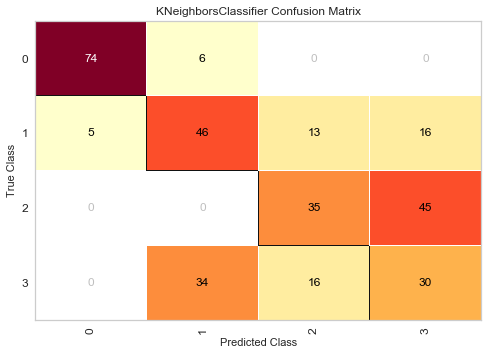


----------------------------------
Validation Data Score: 0.648438



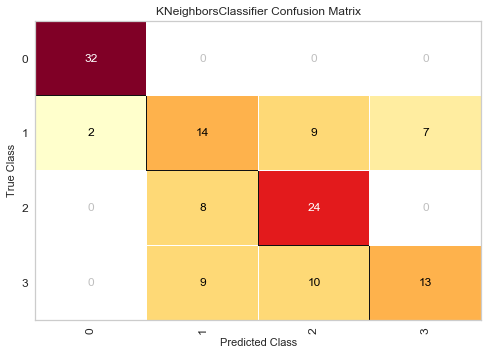


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.658296
----------------------------------
Holdout Data Score: 0.662500



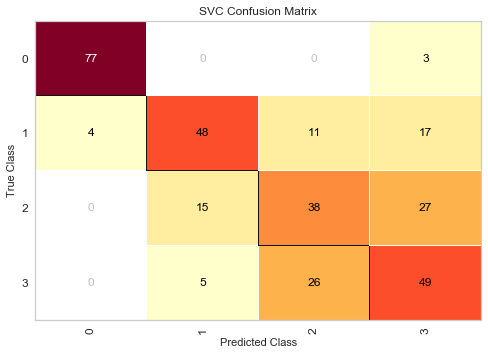


----------------------------------
Validation Data Score: 0.757812



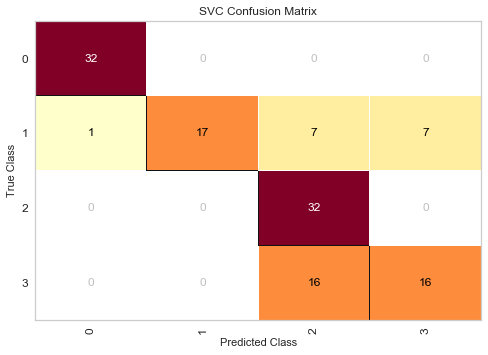


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.945064
----------------------------------
Holdout Data Score: 0.284375



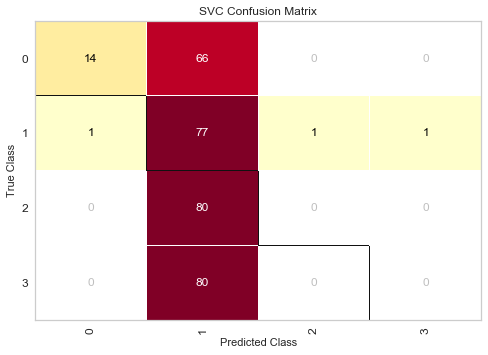


----------------------------------
Validation Data Score: 0.320312



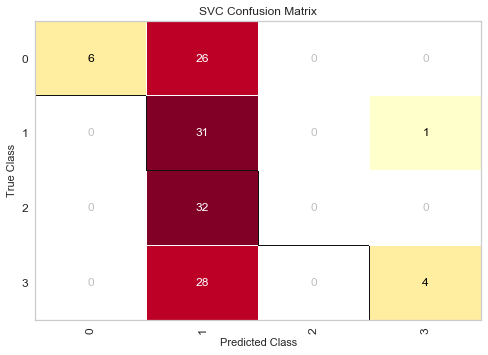

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.913046
----------------------------------
Holdout Data Score: 0.659375



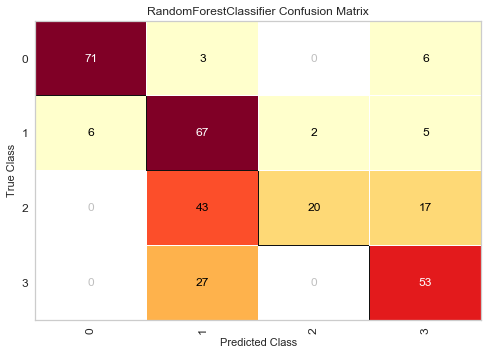


----------------------------------
Validation Data Score: 0.804688



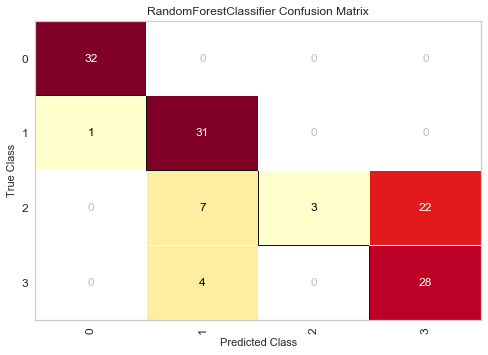


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
----------------------------------
Cross-Validation Mean Accuracy: 0.672024
----------------------------------
Holdout Data Score: 0.534375



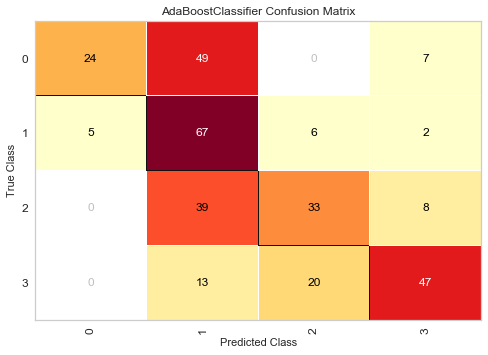


----------------------------------
Validation Data Score: 0.546875



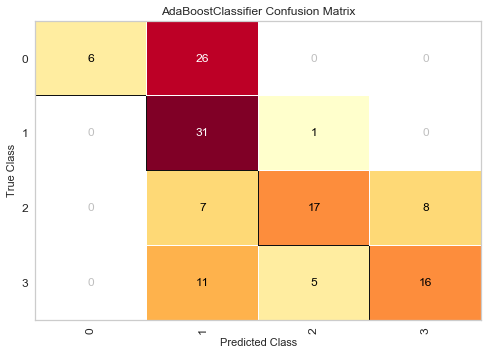


GaussianNB(priors=None)
----------------------------------
Cross-Validation Mean Accuracy: 0.719469
----------------------------------
Holdout Data Score: 0.712500



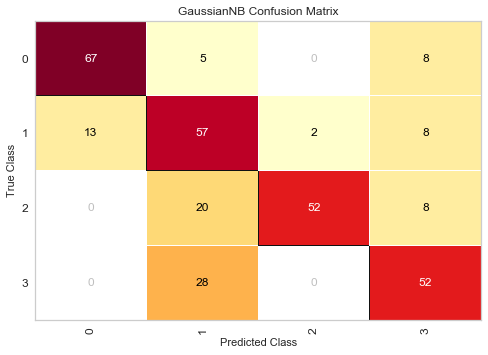


----------------------------------
Validation Data Score: 0.742188



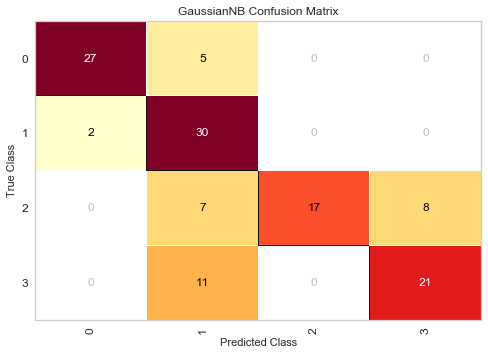


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.882453
----------------------------------
Holdout Data Score: 0.709375



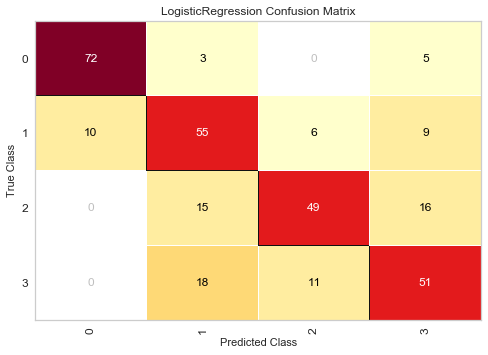


----------------------------------
Validation Data Score: 0.656250



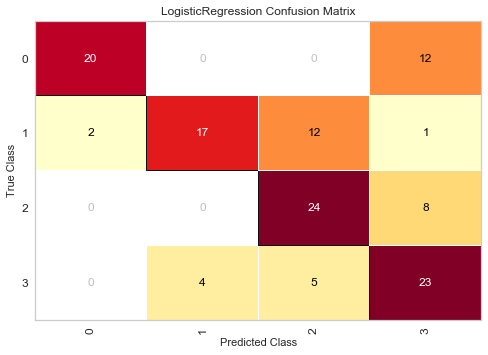


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[25, 25, 25], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.621565
----------------------------------
Holdout Data Score: 0.609375



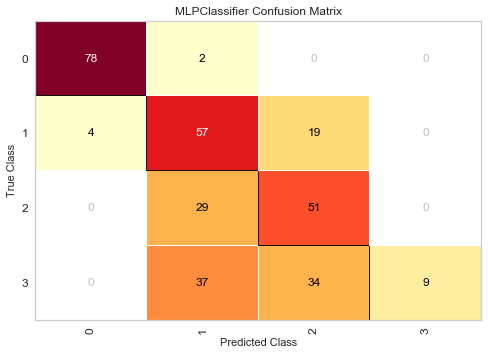


----------------------------------
Validation Data Score: 0.671875



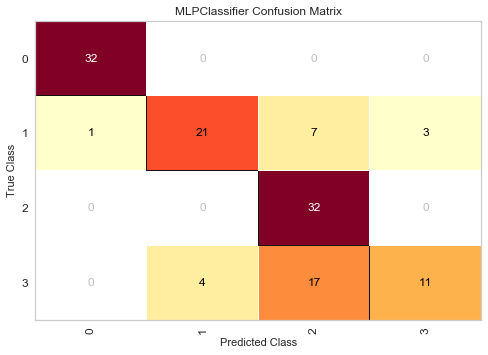

In [13]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support

from yellowbrick.classifier import ConfusionMatrix

classifiers = []

classifiers.append({'name': 'knn', 'model':KNeighborsClassifier(5)})
classifiers.append({'name': 'svc_lin', 'model':SVC(kernel='linear', C=0.025)})
classifiers.append({'name': 'svc_rbf', 'model':SVC(kernel='rbf', gamma=2, C=1)})
classifiers.append({'name': 'rand_for', 'model':RandomForestClassifier(max_depth=5)})
classifiers.append({'name': 'ada', 'model':AdaBoostClassifier()})
classifiers.append({'name': 'gnb', 'model':GaussianNB()})
classifiers.append({'name': 'log', 'model':LogisticRegression(C=1e5)})
classifiers.append({'name': 'ann', 'model':MLPClassifier(hidden_layer_sizes=[25,25,25], alpha=1)})


for classifier in classifiers:
    model = classifier.get('model')
    print("=======================================================================")
    print(model)
    print('----------------------------------')
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(5)).mean()
    print("Cross-Validation Mean Accuracy: %f" %cross_val_acc)
    classifier['cross_val_acc'] = cross_val_acc

    print('----------------------------------')
    cm = ConfusionMatrix(model, classes=[0,1,2,3])
    cm.fit(X_train, y_train)
        
    holdout_acc = model.score(X_holdout, y_holdout)
    print("Holdout Data Score: %f" %holdout_acc)
    print()
    cm.score(X_holdout, y_holdout)
    cm.poof()
    precision, recall, f1, _ = precision_recall_fscore_support(y_holdout, model.predict(X_holdout))
    classifier['holdout_precision'] = {i: precision[i] for i in range(len(precision))}
    classifier['holdout_recall'] = {i: recall[i] for i in range(len(recall))}
    classifier['holdout_f1'] = {i: f1[i] for i in range(len(f1))}
    classifier['holdout_acc'] = holdout_acc
    print()
    print('----------------------------------')
    valid_acc = model.score(X_valid, y_valid)
    print("Validation Data Score: %f" %valid_acc)
    print()
    cm = ConfusionMatrix(model, classes=[0,1,2,3])
    cm.fit(X_train, y_train)
    cm.score(X_valid, y_valid)
    cm.poof()
    precision, recall, f1, _ = precision_recall_fscore_support(y_valid, model.predict(X_valid))
    classifier['valid_precision'] = {i: precision[i] for i in range(len(precision))}
    classifier['valid_recall'] = {i: recall[i] for i in range(len(recall))}
    classifier['valid_f1'] = {i: f1[i] for i in range(len(f1))}
    classifier['valid_acc'] = valid_acc
    
    print()    

In [14]:
import pandas as pd
cl = pd.DataFrame(classifiers)
cl

,cross_val_acc,holdout_acc,holdout_f1,holdout_precision,holdout_recall,model,name,valid_acc,valid_f1,valid_precision,valid_recall
0,0.837810,0.578125,"{0: 0.930817610063, 1: 0.55421686747, 2: 0.486...","{0: 0.936708860759, 1: 0.53488372093, 2: 0.546...","{0: 0.925, 1: 0.575, 2: 0.4375, 3: 0.375}","KNeighborsClassifier(algorithm='auto', leaf_si...",knn,0.648438,"{0: 0.969696969697, 1: 0.444444444444, 2: 0.64...","{0: 0.941176470588, 1: 0.451612903226, 2: 0.55...","{0: 1.0, 1: 0.4375, 2: 0.75, 3: 0.40625}"
1,0.658296,0.662500,"{0: 0.95652173913, 1: 0.648648648649, 2: 0.490...","{0: 0.950617283951, 1: 0.705882352941, 2: 0.50...","{0: 0.9625, 1: 0.6, 2: 0.475, 3: 0.6125}","SVC(C=0.025, cache_size=200, class_weight=None...",svc_lin,0.757812,"{0: 0.984615384615, 1: 0.69387755102, 2: 0.735...","{0: 0.969696969697, 1: 1.0, 2: 0.581818181818,...","{0: 1.0, 1: 0.53125, 2: 1.0, 3: 0.5}"
2,0.945064,0.284375,"{0: 0.294736842105, 1: 0.402088772846, 2: 0.0,...","{0: 0.933333333333, 1: 0.254125412541, 2: 0.0,...","{0: 0.175, 1: 0.9625, 2: 0.0, 3: 0.0}","SVC(C=1, cache_size=200, class_weight=None, co...",svc_rbf,0.320312,"{0: 0.315789473684, 1: 0.41610738255, 2: 0.0, ...","{0: 1.0, 1: 0.264957264957, 2: 0.0, 3: 0.8}","{0: 0.1875, 1: 0.96875, 2: 0.0, 3: 0.125}"
3,0.913046,0.659375,"{0: 0.904458598726, 1: 0.609090909091, 2: 0.39...","{0: 0.922077922078, 1: 0.478571428571, 2: 0.90...","{0: 0.8875, 1: 0.8375, 2: 0.25, 3: 0.6625}","(DecisionTreeClassifier(class_weight=None, cri...",rand_for,0.804688,"{0: 0.984615384615, 1: 0.837837837838, 2: 0.17...","{0: 0.969696969697, 1: 0.738095238095, 2: 1.0,...","{0: 1.0, 1: 0.96875, 2: 0.09375, 3: 0.875}"
4,0.672024,0.534375,"{0: 0.440366972477, 1: 0.540322580645, 2: 0.47...","{0: 0.827586206897, 1: 0.39880952381, 2: 0.559...","{0: 0.3, 1: 0.8375, 2: 0.4125, 3: 0.5875}","(DecisionTreeClassifier(class_weight=None, cri...",ada,0.546875,"{0: 0.315789473684, 1: 0.579439252336, 2: 0.61...","{0: 1.0, 1: 0.413333333333, 2: 0.739130434783,...","{0: 0.1875, 1: 0.96875, 2: 0.53125, 3: 0.5}"
5,0.719469,0.712500,"{0: 0.8375, 1: 0.6, 2: 0.776119402985, 3: 0.66...","{0: 0.8375, 1: 0.518181818182, 2: 0.9629629629...","{0: 0.8375, 1: 0.7125, 2: 0.65, 3: 0.65}",GaussianNB(priors=None),gnb,0.742188,"{0: 0.885245901639, 1: 0.705882352941, 2: 0.69...","{0: 0.931034482759, 1: 0.566037735849, 2: 1.0,...","{0: 0.84375, 1: 0.9375, 2: 0.53125, 3: 0.65625}"
6,0.882453,0.709375,"{0: 0.888888888889, 1: 0.643274853801, 2: 0.67...","{0: 0.878048780488, 1: 0.604395604396, 2: 0.74...","{0: 0.9, 1: 0.6875, 2: 0.6125, 3: 0.6375}","LogisticRegression(C=100000.0, class_weight=No...",log,0.656250,"{0: 0.740740740741, 1: 0.641509433962, 2: 0.65...","{0: 0.909090909091, 1: 0.809523809524, 2: 0.58...","{0: 0.625, 1: 0.53125, 2: 0.75, 3: 0.71875}"
7,0.621565,0.609375,"{0: 0.962962962963, 1: 0.556097560976, 2: 0.55...","{0: 0.951219512195, 1: 0.456, 2: 0.49038461538...","{0: 0.975, 1: 0.7125, 2: 0.6375, 3: 0.1125}","MLPClassifier(activation='relu', alpha=1, batc...",ann,0.671875,"{0: 0.984615384615, 1: 0.736842105263, 2: 0.72...","{0: 0.969696969697, 1: 0.84, 2: 0.571428571429...","{0: 1.0, 1: 0.65625, 2: 1.0, 3: 0.34375}"


__TODO__: Find some way of unpacking and visualizing this by model and class

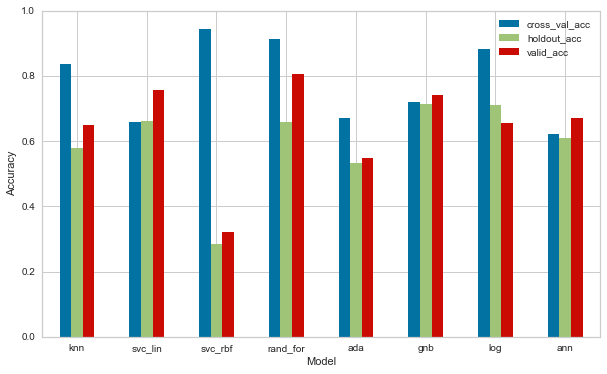

In [18]:
%matplotlib inline
import pandas as pd

group_labels =[c['name'] for c in classifiers]
rows = []
for g in group_labels:
    row = cl.loc[cl['name'] == g][['name','cross_val_acc', 'holdout_acc', 'valid_acc']]
    rows.append(row)
ax = pd.concat(rows).set_index('name').plot(kind='bar', figsize=(10,6), rot=0)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ybound((0,1))
fig = ax.get_figure()
fig.savefig('images/benchmark_accuracies')

